In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading CSV File

In [5]:
df = pd.read_excel('superstore.xls')
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


#### Analysing Dataset

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [53]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month_name()
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2013,November
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2013,November
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2013,June
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2012,October
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2012,October


#### EDA

**Best Selling Products**

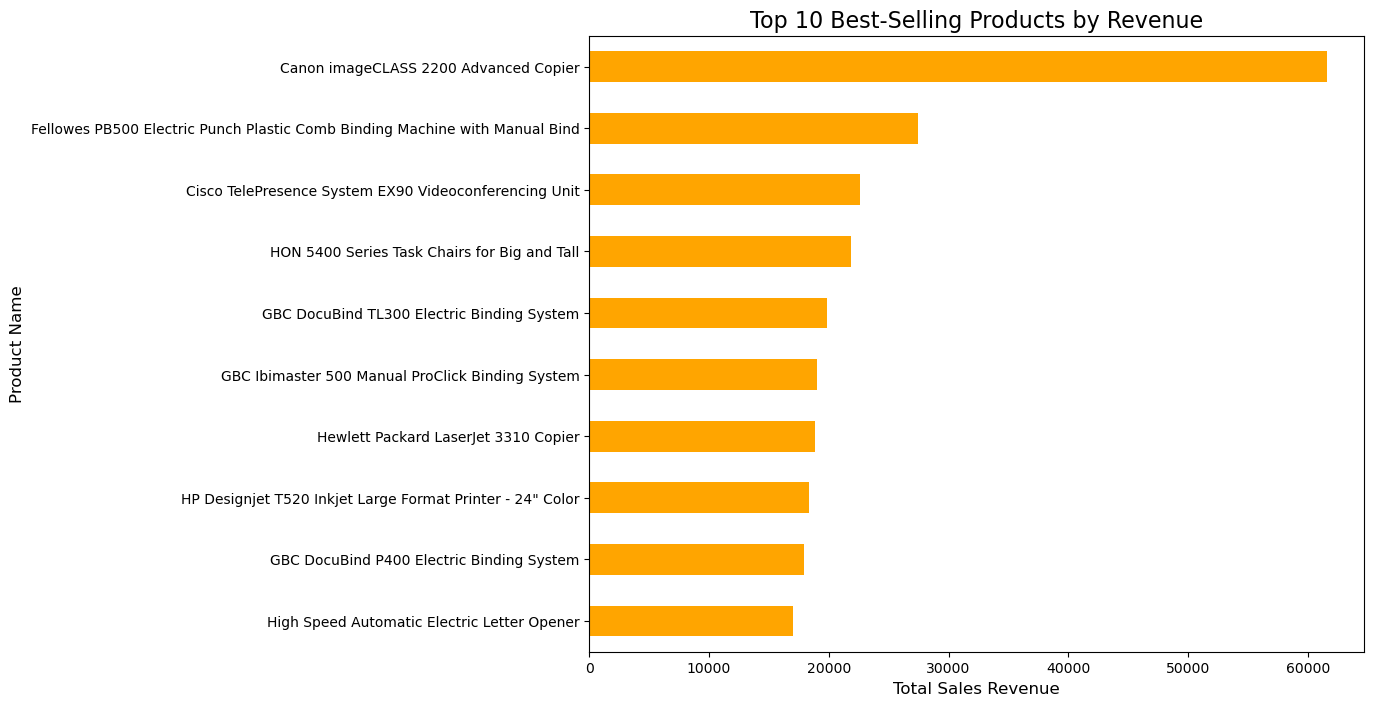

In [67]:
# Group by product, sum the sales, sort, get the top 10, and PLOT!
df.groupby('Product Name')['Sales'].sum().sort_values(ascending=True).tail(10).plot(
    kind='barh',  # 'barh' for horizontal bar chart
    figsize=(10, 8),
    color='orange'
)

plt.title('Top 10 Best-Selling Products by Revenue', fontsize=16)
plt.xlabel('Total Sales Revenue', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.show()

**Top Profitable Product**

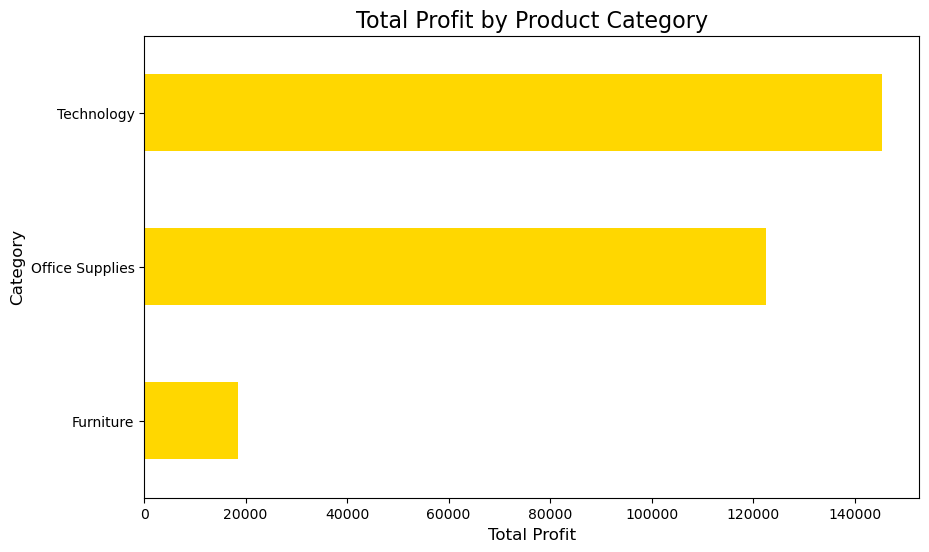

In [88]:
# --- Answering with a chart: Which categories are most PROFITABLE? ---

df.groupby('Category')['Profit'].sum().sort_values().plot(
    kind='barh',
    figsize=(10, 6),
    color='gold'
)

plt.title('Total Profit by Product Category', fontsize=16)
plt.xlabel('Total Profit', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.show()

**Peak Sales**

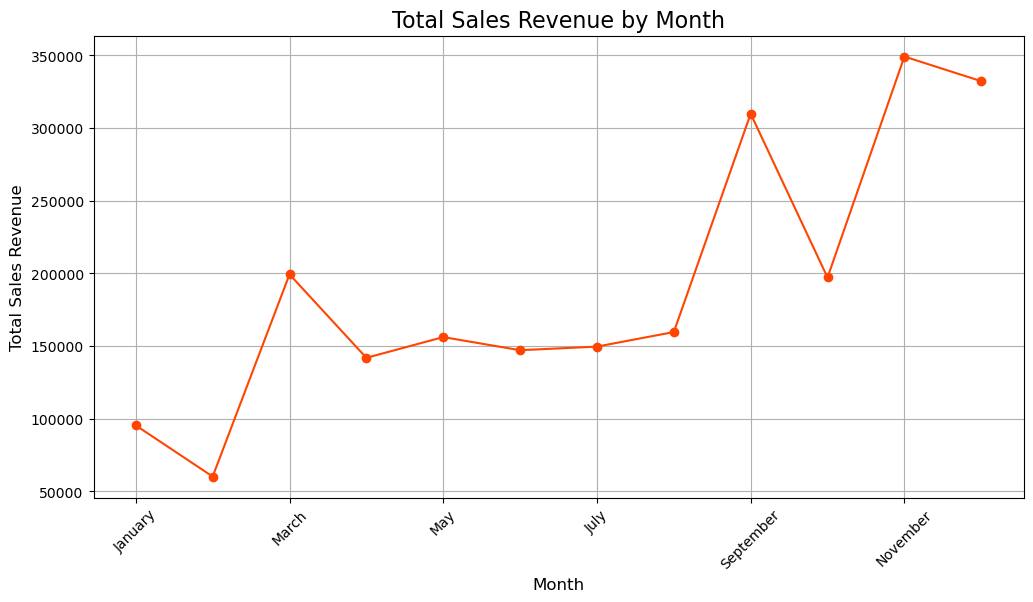

In [70]:
# Define the correct order for months
months_in_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Group by month, sum sales, reorder the index, and PLOT!
df.groupby('Month')['Sales'].sum().reindex(months_in_order).plot(
    kind='line',
    figsize=(12, 6),
    marker='o',
    color='orangered'
)

plt.title('Total Sales Revenue by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales Revenue', fontsize=12)
plt.xticks(rotation=45) # Rotate month names for better readability
plt.grid(True) # Add a grid for easier value reading
plt.show()

**Customer Segments**

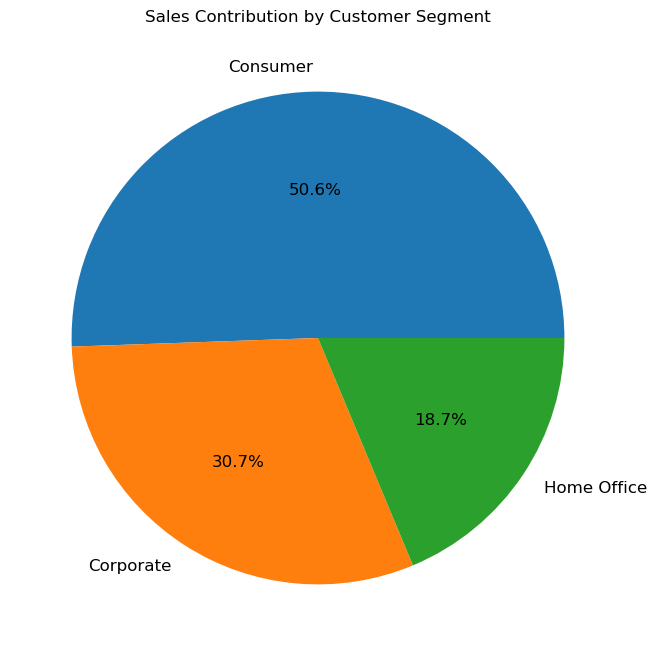

In [96]:
# --- Answering with a chart: Which customer segment is most valuable? ---

df.groupby('Segment')['Sales'].sum().plot(
    kind='pie',
    autopct='%1.1f%%', # Format to show percentages
    figsize=(8, 8),
    title='Sales Contribution by Customer Segment',
    fontsize=12
)
plt.ylabel('') # Hide the 'Sales' label on the side
plt.show()

**Revenue Category wise**

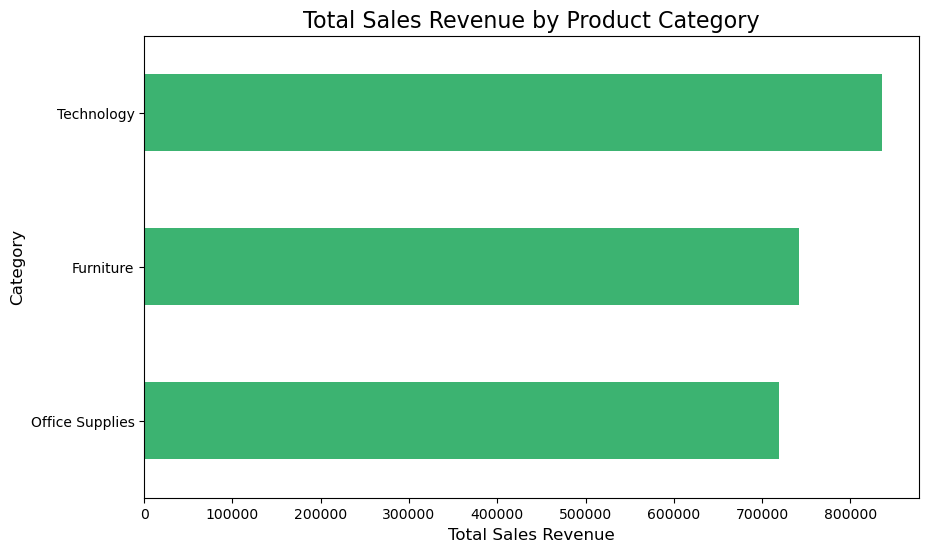

In [73]:
df.groupby('Category')['Sales'].sum().sort_values().plot(
    kind='barh',
    figsize=(10, 6),
    color='mediumseagreen'
)

plt.title('Total Sales Revenue by Product Category', fontsize=16)
plt.xlabel('Total Sales Revenue', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.show()

**Profit Vs Discount Details**

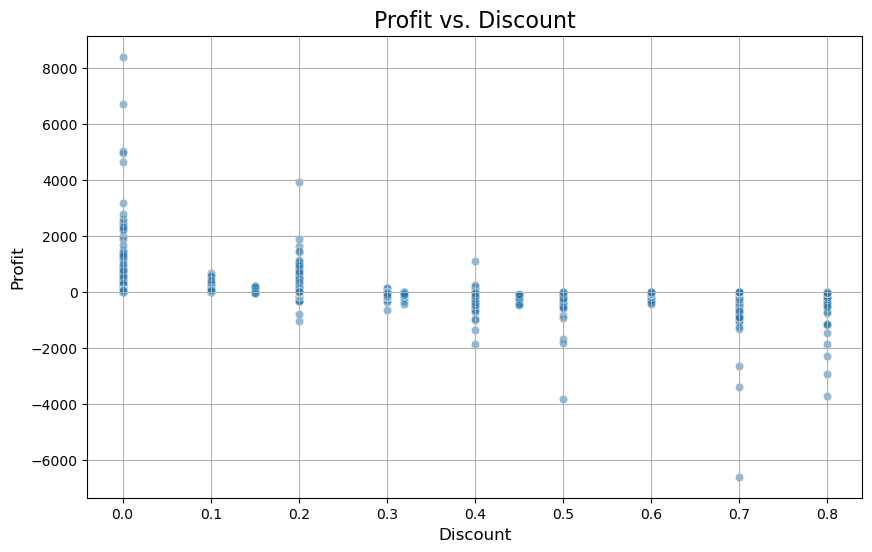

In [100]:
# **The relationship between discount and profit?**

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount', y='Profit', alpha=0.5) # alpha adds transparency

plt.title('Profit vs. Discount', fontsize=16)
plt.xlabel('Discount', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.grid(True)
plt.show()